# Trp-cage haMSM Analysis
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jdrusso/msm_we/HEAD?labpath=examples%2Fanalysis.ipynb)

In [1]:
import matplotlib.pyplot as plt

## Load haMSM

We'll use the haMSM we created in the construction examples.

In [2]:
import pickle

with open('data/pickled_model', 'rb') as inf:
    model = pickle.load(inf)

## Steady-state

Text(0.5, 0, 'MSM State Average Progress Coordinate')

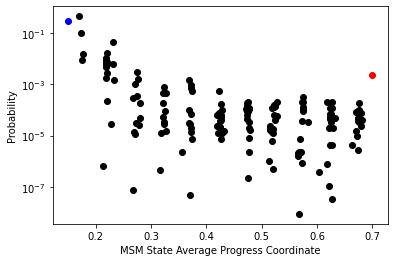

In [3]:
cluster_centers = model.targetRMSD_centers

plt.scatter(cluster_centers, model.pSS, color='k')

# These have NaN entries in targetRMSD_centers, so we set them manually using the bounds
target_pcoord = model.target_pcoord_bounds[0,0]
basis_pcoord = model.basis_pcoord_bounds[0,1]

plt.scatter(target_pcoord, model.pSS[model.indTargets], color='r')
plt.scatter(basis_pcoord, model.pSS[model.indBasis], color='b')


plt.yscale('log')
plt.ylabel('Probability')
plt.xlabel('MSM State Average Progress Coordinate')

## Committors

We can compute the committor for each MSM microstate, which is the probability that a trajectory initiated from that state will reach the target before reaching the basis.

In [4]:
model.get_committor()

[10/04/22 10:35:10] WARNING  Note that, if steady-state weighted ensemble data is being analyzed,    ]8;id=589469;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=957036;file:///home/jd/msm_we/msm_we/msm_we.py#7094\7094]8;;\
                             this is a 'pseudocommittor' and not a true committor as a result of                   
                             being constructed from a one-way ensemble.                                            

  0%|          | 0/5.0 [00:00<?, ?it/s]

It's often interesting to look at the relationship between our progress coordinate and the committor.

Here, we see that our progress coordinate is degenerate in the committor, which suggests it's not a great progress coordinate.

Text(0.5, 0, 'MSM State Average Progress Coordinate')

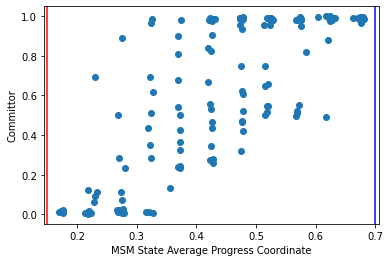

In [5]:
plt.scatter(cluster_centers, model.q)

plt.axvline(model.target_pcoord_bounds[0,0], color='b')
plt.axvline(model.basis_pcoord_bounds[0,1], color='r')

plt.ylabel('Committor')
plt.xlabel('MSM State Average Progress Coordinate')

## Flux profiles

In [6]:
model.get_flux()

We can plot flux profiles for the full-data model as well as the validation models. The flatness of this flux profile is a proxy for how converged your WE is.

We can visualize it in progress-coordinate space...

[10/04/22 10:35:11] WARNING  Fluxes have not yet been generated for validation_model_0, generating   ]8;id=439635;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=350005;file:///home/jd/msm_we/msm_we/msm_we.py#6309\6309]8;;\
                             now.                                                                                  

                    WARNING  Fluxes have not yet been generated for validation_model_1, generating   ]8;id=611279;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=699671;file:///home/jd/msm_we/msm_we/msm_we.py#6309\6309]8;;\
                             now.                                                                                  

(5000.0, 50000000.0)

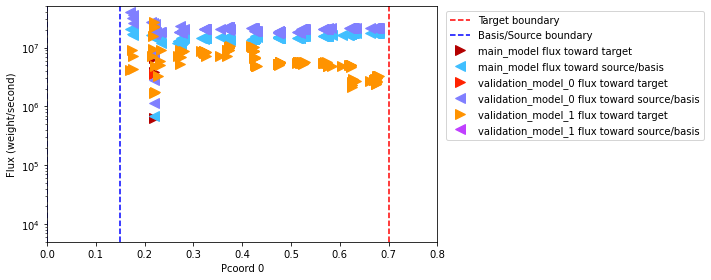

In [7]:
ax = model.plot_flux()

ax.set_xlim([0,0.8])
ax.set_ylim([5e3, 5e7])

Or in committor-space.

[10/04/22 10:35:12] WARNING  Committor-fluxes have not yet been generated for main_model, generating ]8;id=898834;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=423600;file:///home/jd/msm_we/msm_we/msm_we.py#6159\6159]8;;\
                             now.                                                                                  

Obtaining pseudocommittor-fluxes:   0%|          | 0/166 [00:00<?, ?it/s]

[10/04/22 10:35:13] WARNING  Committors have not yet been generated for validation_model_0,          ]8;id=916449;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=733009;file:///home/jd/msm_we/msm_we/msm_we.py#6153\6153]8;;\
                             generating now.                                                                       

                    WARNING  Note that, if steady-state weighted ensemble data is being analyzed,    ]8;id=9218;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=709763;file:///home/jd/msm_we/msm_we/msm_we.py#7094\7094]8;;\
                             this is a 'pseudocommittor' and not a true committor as a result of                   
                             being constructed from a one-way ensemble.                                            

  0%|          | 0/5.0 [00:00<?, ?it/s]

                    WARNING  Committor-fluxes have not yet been generated for validation_model_0,    ]8;id=908062;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=100698;file:///home/jd/msm_we/msm_we/msm_we.py#6159\6159]8;;\
                             generating now.                                                                       

Obtaining pseudocommittor-fluxes:   0%|          | 0/140 [00:00<?, ?it/s]

[10/04/22 10:35:14] WARNING  Committors have not yet been generated for validation_model_1,          ]8;id=427801;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=877336;file:///home/jd/msm_we/msm_we/msm_we.py#6153\6153]8;;\
                             generating now.                                                                       

                    WARNING  Note that, if steady-state weighted ensemble data is being analyzed,    ]8;id=355564;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=193892;file:///home/jd/msm_we/msm_we/msm_we.py#7094\7094]8;;\
                             this is a 'pseudocommittor' and not a true committor as a result of                   
                             being constructed from a one-way ensemble.                                            

  0%|          | 0/5.0 [00:00<?, ?it/s]

                    WARNING  Committor-fluxes have not yet been generated for validation_model_1,    ]8;id=626434;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=468642;file:///home/jd/msm_we/msm_we/msm_we.py#6159\6159]8;;\
                             generating now.                                                                       

Obtaining pseudocommittor-fluxes:   0%|          | 0/149 [00:00<?, ?it/s]

                    WARNING  Note that, if steady-state weighted ensemble data is being analyzed,    ]8;id=990883;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=6869;file:///home/jd/msm_we/msm_we/msm_we.py#7094\7094]8;;\
                             this is a 'pseudocommittor' and not a true committor as a result of                   
                             being constructed from a one-way ensemble.                                            

(5000.0, 50000000.0)

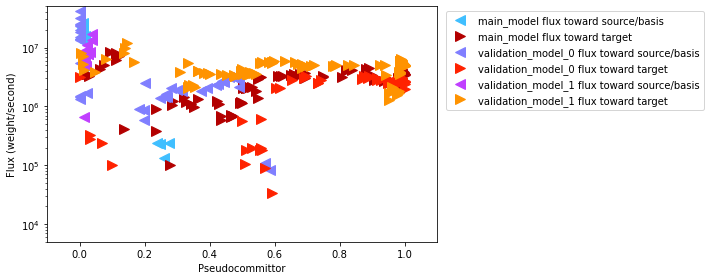

In [8]:
ax = model.plot_flux_committor()
ax.set_ylim([5e3, 5e7])

## Cluster structures

In [9]:
model.update_cluster_structures()

Let's get the coordinates of a structure that got assigned to MSM microstate 3.

In [10]:
model.cluster_structures[3][0].shape

(272, 3)